# NLE Assignment: Sentiment Classification

In this assignment, you will be investigating NLP methods for distinguishing positive and negative reviews written about movies.

For assessment, you are expected to complete and submit this notebook file.  When answers require code, you may import and use library functions (unless explicitly told otherwise).  All of your own code should be included in the notebook rather than imported from elsewhere.  Written answers should also be included in the notebook.  You should insert as many extra cells as you want and change the type between code and markdown as appropriate.

In order to avoid misconduct, you should not talk about the assignment questions with your peers.  If you are not sure what a question is asking you to do or have any other questions, please ask me or one of the Teaching Assistants.

Marking guidelines are provided as a separate document.

The first few cells contain code to set-up the assignment and bring in some data.   In order to provide unique datasets for analysis by different students, you must enter your candidate number in the following cell.  Otherwise do not change the code in these cells.

In [59]:
candidateno=283127 #this MUST be updated to your candidate number so that you get a unique data sample


In [60]:
#do not change the code in this cell
#preliminary imports

#set up nltk
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('movie_reviews')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import movie_reviews

#for setting up training and testing data
import random

#useful other tools
import re
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from itertools import zip_longest
from nltk.probability import FreqDist
from nltk.classify.api import ClassifierI


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


In [61]:
#do not change the code in this cell
def split_data(data, ratio=0.7): # when the second argument is not given, it defaults to 0.7
    """
    Given corpus generator and ratio:
     - partitions the corpus into training data and test data, where the proportion in train is ratio,

    :param data: A corpus generator.
    :param ratio: The proportion of training documents (default 0.7)
    :return: a pair (tuple) of lists where the first element of the
            pair is a list of the training data and the second is a list of the test data.
    """

    data = list(data)
    n = len(data)
    train_indices = random.sample(range(n), int(n * ratio))
    test_indices = list(set(range(n)) - set(train_indices))
    train = [data[i] for i in train_indices]
    test = [data[i] for i in test_indices]
    return (train, test)


def get_train_test_data():

    #get ids of positive and negative movie reviews
    pos_review_ids=movie_reviews.fileids('pos')
    neg_review_ids=movie_reviews.fileids('neg')

    #split positive and negative data into training and testing sets
    pos_train_ids, pos_test_ids = split_data(pos_review_ids)
    neg_train_ids, neg_test_ids = split_data(neg_review_ids)
    #add labels to the data and concatenate
    training = [(movie_reviews.words(f),'pos') for f in pos_train_ids]+[(movie_reviews.words(f),'neg') for f in neg_train_ids]
    testing = [(movie_reviews.words(f),'pos') for f in pos_test_ids]+[(movie_reviews.words(f),'neg') for f in neg_test_ids]

    return training, testing

When you have run the cell below, your unique training and testing samples will be stored in `training_data` and `testing_data`

In [62]:
#do not change the code in this cell
random.seed(candidateno)
training_data,testing_data=get_train_test_data()
print("The amount of training data is {}".format(len(training_data)))
print("The amount of testing data is {}".format(len(testing_data)))
print("The representation of a single data item is below")
print(training_data[0])

The amount of training data is 1400
The amount of testing data is 600
The representation of a single data item is below
(['deep', 'rising', 'is', 'one', 'of', '"', 'those', ...], 'pos')


1)  
a) **Generate** a list of 10 content words which are representative of the positive reviews in your training data.

b) **Generate** a list of 10 content words which are representative of the negative reviews in your training data.

c) **Explain** what you have done and why

[20\%]

In [63]:
from nltk.probability import FreqDist

doc1 = FreqDist(training_data[0][0])
doc1
training_basic=[(FreqDist(wordlist),label) for (wordlist,label) in training_data]
testing_basic=[(FreqDist(wordlist),label) for (wordlist,label) in testing_data]

from nltk.corpus import stopwords
stop = stopwords.words('english')

def normalise(wordlist):
    lowered=[word.lower() for word in wordlist]
    filtered=[word for word in lowered if word.isalpha() and word not in stop]
    return filtered

normalise(training_data[0][0])


['deep',
 'rising',
 'one',
 'movies',
 'kind',
 'movie',
 'serves',
 'purpose',
 'except',
 'entertain',
 'us',
 'ask',
 'us',
 'think',
 'important',
 'questions',
 'like',
 'life',
 'planets',
 'possibility',
 'god',
 'screw',
 'says',
 'boldly',
 'let',
 'see',
 'computer',
 'generated',
 'monsters',
 'rip',
 'decapitate',
 'generally',
 'cause',
 'irreparable',
 'booboos',
 'bunch',
 'little',
 'known',
 'actors',
 'heh',
 'wacky',
 'monsters',
 'gotta',
 'love',
 'em',
 'course',
 'since',
 'rent',
 'thousand',
 'b',
 'movies',
 'kind',
 'story',
 'hollywood',
 'must',
 'give',
 'little',
 'extra',
 'oumph',
 'get',
 'people',
 'theaters',
 'deep',
 'rising',
 'fails',
 'good',
 'thing',
 'confused',
 'let',
 'explain',
 'despite',
 'flashy',
 'effects',
 'big',
 'explosions',
 'deep',
 'rising',
 'still',
 'heart',
 'good',
 'ol',
 'b',
 'movie',
 'luckily',
 'good',
 'b',
 'movie',
 'worst',
 'cliches',
 'movie',
 'history',
 'b',
 'movie',
 'bread',
 'butter',
 'therefore',
 '

In [64]:
pos_freq_dist=FreqDist()
neg_freq_dist=FreqDist()

training_norm=[(FreqDist(normalise(wordlist)),label) for (wordlist,label) in training_data]
testing_norm=[(FreqDist(normalise(wordlist)),label) for (wordlist,label) in testing_data]



for reviewDist,label in training_norm:
    if label=='pos':
        pos_freq_dist+=reviewDist
    else:
        neg_freq_dist+=reviewDist
pos_freq_dist

posdiff=pos_freq_dist-neg_freq_dist



def most_frequent_words(posfreq,negfreq,topk):
    difference=posfreq-negfreq
    sorteddiff=difference.most_common()
    justwords=[word for (word,freq) in sorteddiff[:topk]]
    return justwords

top_pos=most_frequent_words(pos_freq_dist,neg_freq_dist,10)
print(top_pos)

top_neg=most_frequent_words(neg_freq_dist,pos_freq_dist,10)
print(top_neg)



['film', 'life', 'also', 'great', 'one', 'well', 'world', 'best', 'story', 'many']
['movie', 'bad', 'plot', 'script', 'even', 'nothing', 'worst', 'action', 'least', 'boring']


c) We first take the each string and it frequency from the movie review corpus and normalise the data and removing stopwords. Then with the help of label we categorize the frequency distribution of both positive and negative reviews.
To generate the content words we use the function most_frequent_word in both pos and neg to print out topmost positive and topmost negative reviews.

2)
a) **Use** the lists generated in Q1 to build a **word list classifier** which will classify reviews as being positive or negative.

b) **Explain** what you have done.

[12.5\%]


In [65]:
class SimpleClassifier(ClassifierI):

    def __init__(self, pos, neg):
        self._pos = pos
        self._neg = neg

    def classify(self, doc):
        #doc is a FreqDist
        score = 0

        for word,value in doc.items():
            if word in self._pos:
                score+=value
            if word in self._neg:
                score-=value

        return "neg" if score < 0 else "pos"

    def labels(self):
        return ("pos", "neg")



In [66]:
class SimpleClassifier_mf(SimpleClassifier):

    def __init__(self,k):
        self._k=k

    def train(self,training_data):

        pos_freq_dist=FreqDist()
        neg_freq_dist=FreqDist()

        for reviewDist,label in training_norm:
            if label=='pos':
                pos_freq_dist+=reviewDist
            else:
                neg_freq_dist+=reviewDist

        self._pos=most_frequent_words(pos_freq_dist,neg_freq_dist,self._k)
        self._neg=most_frequent_words(neg_freq_dist,pos_freq_dist,self._k)

#example of both pos and neg


movieclassifier=SimpleClassifier_mf(10)
movieclassifier.train(training_norm)


print(movieclassifier.classify(FreqDist("The movie was boring".split())), "= The movie was boring.")
print(movieclassifier.classify(FreqDist("The movie was great".split())), "= The movie was great.")

neg = The movie was boring.
pos = The movie was great.


**SimpleClassifier** and its subclass **SimpleClassifier_mf**, both designed for text classification tasks. The base class, **SimpleClassifier**, is constructed with sets of positive (_pos) and negative (_neg) words. It implements a classify method that takes a document represented as a frequency distribution and assigns a label ("pos" or "neg") based on the presence and frequency of words in the positive and negative sets. The labels method returns a tuple of possible labels.

The subclass, **SimpleClassifier_mf**, extends the base class and introduces a train method. This method takes training data, assumed to be tuples of a review represented as a frequency distribution (reviewDist) and a label ("pos" or "neg"). During training, it builds separate frequency distributions for positive and negative reviews. The class has an additional parameter k, which is used to determine the top k most frequent words in each class. The most_frequent_words function is assumed to be a helper function to select the most frequent words based on this parameter. These selected words then become the updated positive and negative word sets (_pos and _neg).

3)
a) **Calculate** the accuracy, precision, recall and F1 score of your classifier.

b) Is it reasonable to evaluate the classifier in terms of its accuracy?  **Explain** your answer and give a counter-example (a scenario where it would / would not be reasonable to evaluate the classifier in terms of its accuracy).

[20\%]

In [67]:
from nltk.probability import FreqDist
from nltk.classify.api import ClassifierI
def classifier_evaluate(cls, test_data):
    '''
    cls: an instance of a classifier object which has a classify method which returns "pos" or "neg"
    test_data: a list of pairs where each pair is a FreqDist rep of a doc and its label

    returns: float point number which is the accuracy of the classifier on the test data provided
    '''
    acc = 0
    docs,goldstandard=zip(*test_data) #note this neat pythonic way of turning a list of pairs into a pair of lists
    #pass all of the docs to the classifier and get back a list of predictions
    predictions=cls.classify_many(docs)
    #zip the predictions with the goldstandard labels and compare
    for prediction,goldlabel in zip(predictions,goldstandard):
        if prediction==goldlabel:
            acc+=1

    return acc / (len(test_data))

In [68]:
movie_classifier = SimpleClassifier_mf(10)
#train it
movie_classifier.train(training_norm)
#evaluate it on the test data
score=classifier_evaluate(movie_classifier,testing_norm)
print("Accuracy:" ,score)

Accuracy: 0.5916666666666667


In [69]:
class ConfusionMatrix:
    def __init__(self,predictions,goldstandard,classes=("pos","neg")):

        (self.c1,self.c2)=classes
        #self.predictions=predictions
        self.TP=0
        self.FP=0
        self.FN=0
        self.TN=0
        for p,g in zip(predictions,goldstandard):
            if g==self.c1:
                if p==self.c1:
                    self.TP+=1
                else:
                    self.FN+=1

            elif p==self.c1:
                self.FP+=1
            else:
                self.TN+=1


    def precision(self):
        p=0
        if self.TP + self.FP == 0:
          return 0
        p = self.TP / (self.TP + self.FP)

        return p

    def recall(self):
        r=0
        if self.TP + self.FN == 0:
          return 0
        r= self.TP / (self.TP + self.FN)
        return r

    def f1(self):
        f1=0
        #put your code to compute f1 here
        p=self.precision()
        r=self.recall()
        f1=2*p*r/(p+r)
        return f1



In [70]:
docs,labels=zip(*testing_norm)
senti_cm=ConfusionMatrix(movie_classifier.classify_many(docs),labels)
print(senti_cm.TP)
print(senti_cm.FP)
print(senti_cm.TN)
print(senti_cm.FN)
print(' ')
print("Precesion:",senti_cm.precision())
print("Recall:" ,senti_cm.recall())
print("f1:" ,senti_cm.f1())

269
214
86
31
 
Precesion: 0.556935817805383
Recall: 0.8966666666666666
f1: 0.6871008939974458


It not reasonable to classify the data in term of accurcay. As when we have unbalanced data interm of _pos and _neg where the relevace of document is around 5% and irrelevance in the document is 95% so there is no point or its useless. It is only reasonable if data are balanced.

4)
a)  **Construct** a Naive Bayes classifier (e.g., from NLTK).

b)  **Compare** the performance of your word list classifier with the Naive Bayes classifier.  **Discuss** your results.

[12.5\%]

In [71]:
import math

class NBClassifier(ClassifierI):

    def __init__(self):

        pass

    def _set_known_vocabulary(self,training_norm):
        known=[]
        for doc,label in training_norm:
            known+=list(doc.keys())
        self.known= set(known)

    def _set_priors(self,training_norm):
        priors={}
        for (doc,label) in training_norm:
            priors[label]=priors.get(label,0)+1
        total=sum(priors.values())
        for key,value in priors.items():
            priors[key]=value/total
        self.priors=priors

    def _set_cond_probs(self,training_norm):
        conds={}
        for(doc,label) in training_norm:
            classcond=conds.get(label,{})
            for word in doc.keys():
                classcond[word]=classcond.get(word,0)+1

            conds[label]=classcond

        for label, classcond in conds.items():
            for word in self.known:

                classcond[word]=classcond.get(word,0)+1
            conds[label]=classcond

        for label,dist in conds.items():
            total=sum(dist.values())
            conds[label]={key:value/total for (key,value) in dist.items()}

        self.conds=conds

    def train(self,training_norm):
        self._set_known_vocabulary(training_norm)
        self._set_priors(training_norm)
        self._set_cond_probs(training_norm)

    def classify(self,doc):
        doc_probs={key:math.log(value) for (key,value) in self.priors.items()}
        for word in doc.keys():
            if word in self.known:
                doc_probs={classlabel:sofar+math.log(self.conds[classlabel].get(word,0)) for (classlabel,sofar) in doc_probs.items()}

        highprob=max(doc_probs.values())
        classes=[c for c in doc_probs.keys() if doc_probs[c]==highprob]
        return random.choice(classes)


myclassifier=NBClassifier()
myclassifier.train(training_norm)
myclassifier.classify_many(doc for (doc,label) in testing_norm)


['pos',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'pos',
 'pos',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'pos',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'pos',
 'pos',
 'pos',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',


In [72]:
docs,labels=zip(*testing_norm)
my_classifier= NBClassifier()
my_classifier.train(training_norm)
cm=ConfusionMatrix(my_classifier.classify_many(docs),labels,classes=('pos','neg'))
acc_NB = classifier_evaluate(my_classifier, testing_norm)



print("My Wordlist-Classifier:")
print("Accuracy: {:.2f}".format(score))
print("Precision: {:.2f}".format(senti_cm.precision()))
print("Recall: {:.2f}".format(senti_cm.recall()))
print("f1: {:.2f}".format(senti_cm.f1()))

print("")

print("My NaiveBayes-Classifier: ")
print("Accuracy: {:.2f}".format(acc_NB))
print("Precision: {:.2f}".format(cm.precision()))
print("Recall: {:.2f}".format(cm.recall()))
print("f1: {:.2f}".format(cm.f1()))



My Wordlist-Classifier:
Accuracy: 0.59
Precision: 0.56
Recall: 0.90
f1: 0.69

My NaiveBayes-Classifier: 
Accuracy: 0.83
Precision: 0.83
Recall: 0.82
f1: 0.83


b) Naive Bayes are much better than word list classifier as accuracy, precision, recall and f1 scores are much those in wordlist classifier. Naive bayes can handle more complicated data and classify data much efficiently as they have low computation cost with ability of handling large data sets. Wordlist might not able to generalize on unseen data hence creating inaccuracies in results as they not performvery well in different sentiments. Ultimately, the "better" classifier depends on the specific requirements of your task, the characteristics of your data, and your goals for interpretability and adaptability.

5)
a) Design and **carry out an experiment** into the impact of the **length of the wordlists** on the wordlist classifier.  Make sure you **describe** design decisions in your experiment, include a **graph** of your results and **discuss** your conclusions.

b) Would you **recommend** a wordlist classifier or a Naive Bayes classifier for future work in this area?  **Justify** your answer.

[25\%]


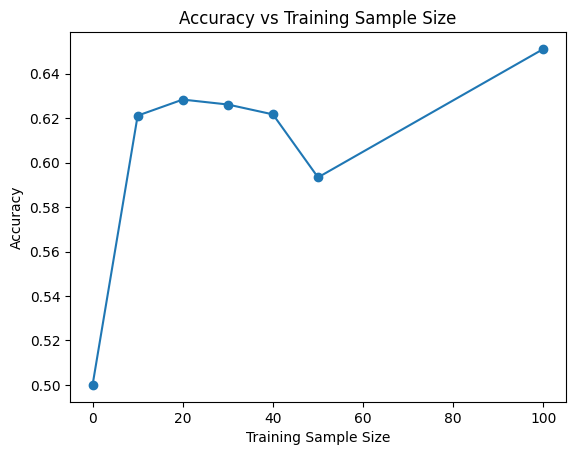

In [73]:
import matplotlib.pyplot as plt

from random import sample

# Assuming get_train_test_data, FreqDist, normalise, most_frequent_words,
# SimpleClassifier, and classifier_evaluate are defined elsewhere

sample_sizes = [0, 10, 20, 30, 40, 50, 100]
results = {}
word_list_size = 100
number_of_runs = 3

for size in sample_sizes:
    scores = 0  # Variable to store cumulative scores across runs

    for i in range(number_of_runs):
        training, testing = get_train_test_data()

        training_norm = [(FreqDist(normalise(wordlist)), label) for (wordlist, label) in training]
        testing_norm = [(FreqDist(normalise(wordlist)), label) for (wordlist, label) in testing]

        pos_train = most_frequent_words(pos_freq_dist, neg_freq_dist, size)
        neg_train = most_frequent_words(neg_freq_dist, pos_freq_dist, size)

        classifier = SimpleClassifier(pos_train, neg_train)

        accuracy = classifier_evaluate(classifier, testing_norm)
        scores += accuracy

    average_accuracy = scores / number_of_runs
    results[size] = average_accuracy

# Plotting the results
plt.plot(results.keys(), results.values(), marker='o')
plt.title('Accuracy vs Training Sample Size')
plt.xlabel('Training Sample Size')
plt.ylabel('Accuracy')
plt.show()


a) I plotted a graph for training set of data against it accuraacies at varying lenght og wordlist. The graph shows that initiallly the accuracy is 50% when there is no sample data and when we increases the sampel size the accuracy increases at 20size about 64%. And after that it decreses little bit and the graph shows a variation in accuracy as the sample size increases.

b) I would recommend using naive bayes classifer as it can deal with complex dataset and maintain the accuracy throughout. As we can see from wordlist classsifer graph that their is variations in the acuuracy. In term of efiiceny and performance it precision recall and f1 are consistent iin naive bayes classifer.

In [74]:
##This code will word count all of the markdown cells in the notebook saved at filepath

import io
from nbformat import current

from google.colab import drive
drive.mount('/content/drive')

filepath="/content/drive/MyDrive/Colab Notebooks/NLEassignment2023.ipynb"
question_count=432

with io.open(filepath, 'r', encoding='utf-8') as f:
    nb = current.read(f, 'json')

word_count = 0
for cell in nb.worksheets[0].cells:
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').lstrip().split(' '))
print("Submission length is {}".format(word_count-question_count))

<ipython-input-74-4e7ec440cfa2>:4: DeprecationWarning: nbformat.current is deprecated since before nbformat 3.0

- use nbformat for read/write/validate public API
- use nbformat.vX directly to composing notebooks of a particular version

  from nbformat import current


Mounted at /content/drive
Submission length is 0
